## 相关概念



样本不均匀的解决方法:
  - 下采样
  - 过采样

一份数据一般划分为三部分: 
  - 训练集(train): 用于训练模型的参数
  - 验证集(valid): 用于评估模型性能和调优超参数
  - 测试集(test): 评估模型最终的泛化能力
  注意, 其中的测试集, 可以认为是 "未来" 的数据。 我们训练一个模型, 为的就是让他能够对未知的数据进行预测。  
  
K 折交叉验证的过程一般是这样的:
  1. 将原始数据集划分为 K 份
  2. 选取第 i 份作为测试集
  3. 除了第 i 份数据, 将剩余数据划分为训练集和验证集
  4. 开始训练, 得到一个模型和一次验证结果
  5. 总共会重复 k 次重复步骤 2-4。
  6. 最终可以得到 K 个模型和 K 次验证结果，最终将这些结果取平均值作为模型的性能指标。  
  注意: K 折交叉验证, 每次训练, 测试集都是不一样的。

交叉验证:
  除了 K 折交叉验证外, 还有其他类型的交叉验证, 比如:
  - Leave-One-Out(LOO): 留一法交叉验证。 即先从数据集中单独取出测试集, 然后再对剩下的数据划分为 K 折, 每折中再对数据划分为训练集和验证集
  - 嵌套交叉验证的变体: 将数据分为 k 份, 然后在每份数据中再将数据分为 3 份: 训练、验证和测试
  - 嵌套交叉验证: 相当于嵌套 K 折交叉验证, 先将数据划分为 K 份, 每次选取其中一份作为测试集, 此时对剩下的数据再做一次 K 折交叉验证。
  - ... 其他  
  LOO 可以提供更准确的性能评估指标, 但它的计算成本较高, 当数据量非常少的时候, LOO 可能比 K 折交叉验证更合适。 
  当数据量足够大时, 嵌套交叉可以提供更准确的模型性能评估, 它也要求更高的计算资源。
  总的来说, 从计算成本和可靠性的角度来看, 通常认为k折交叉验证是更好的选择。
  



TP, TN, FP, FN
  T 和 F 指的是 True, False。 即预测的结果是否正确。
  P 和 N 指的是 Positive, Negative。 P 指的是与我们的目标相符, N 指的与我们的目标不符。 比如检测癌症, 我们的目标就是检测出癌症, 如果检测为没有癌症, 则是 N
  所以可以这样理解比较方便, 先看是 P 还是 N, 然后再看是对还是错。 
  下面举多几个例子方便理解:
  - 信用卡欺诈, 我们的 P 是找到欺诈的信用卡。 
    - TP 就是判定为欺诈, 并且判断对了; 
    - TN 就是判断为不是欺诈, 结果判定对了; 
    - FP 就是判断我欺诈, 结果判断错了;
    - FN 就是判断为不是欺诈, 结果判断错了;
  - 癌症检测, 我们的 P 是检测出癌症
    - TP 就是检测为癌症, 并且检测对了;
    - TN 就是认为没有癌症, 并且确实没有癌症;
    - FP 就是检测为癌症, 但是检测错了;
    - FN 就是认为没有癌症, 但实际上有癌症;
  - 找出狼人, 我们的 P 是找出狼人
    - TP 就是判断为狼人, 并且判断对了;
    - TN 就是判断为平民, 并且判断对了;
    - FP 就是判断为狼人, 但是判断错了。即把平民误判为狼人;
    - FN 就出判断为平民, 但是判断错了。即把狼人错当成平民;
  这些在实际生活中有什么作用呢? 那就是看需求了, 是要"宁可错杀一万, 也不放过一个"呢, 还是要"疑罪从无"呢?
  比如信用卡欺诈, 如果 FP 太大, 则说明误判为欺诈的用户过多, 这可能导致大量用户的账户被冻结, 这是不允许的。
  所以即使 recall 分数很高, 但如果 FP 太大, 也是不可取的


混淆矩阵: 在这里其实指的就是 TP, TN, FP, FN 的可视化结果:

        TN FN
        FP TP

模型的度量指标: 常见的有下面几种:
  - 准确率(precision): 预测为该类别的样本数与实际属于该类别的样本数之比。 即 precision = (TP+TN) / (TP+TN+FP+FN); 
    $$precision = \frac{TP+TN}{TP+TN+FP+FN}$$
  - 召回率(recall): 被正确预测为该类别的样本数与实际属于该类别的样本数之比。 即 Recall = TP / (TP + FP); 
    $$Recall = \frac{TP}{TP + FP}$$
  - F1_score: 准确率和召回率的加权平均值。 即 F1_score = 2 * ((precision * recall) / (precision + recall)); 
    $$F1\_score = 2 * \frac{(precision * recall)}{(precision + recall)}$$
  - 支持度(support): 实际属于该类别的样本数。 即 support = TP + FN; 
    $$support = TP + FN$$








正则化惩罚项
  loss 是损失函数, loss 越小, 代表效果越好。
  那么惩罚的方法, 就是让 loss 加上一个值。 比如, 千米跑时, 用时肯定越低越好。 当我们惩罚某人时, 可以让他加上配重跑步, 此时用时就会变大了, 如果负重跑步成绩还非常好的话, 说明它确实很好。
  这个配重, 就是惩罚项。 比如 L2 的配重就是 0.5w平方;  
  L1 惩罚, 就是 w的绝对值
  但惩罚也是有强度的, 即要给人加上几个配重, 这个值就是 $\lambda$

  scikit-learn 中的 LogisticRegression() 函数, 它的参数叫做 `C`, 这个 c 字母没有具体意义(全称), 可以说它的命名有点随意。 但它表示的是正则化强度的倒数
  

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rcParams['font.family'] = ['SimHei']

## 1. 先观察分析数据

In [2]:
data = pd.read_csv('./resource/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


观察数据, Time 是没有价值的。 故后面我们会将该列删去。

这些数据是信用卡原数据经过脱敏, 降维处理过的, 其中的 V1 ~ V28, Amount 都是特征, 故我们不需要再提取特征。

Amount 的值相对其他特征来说, 数值偏大, 区间跨区也大。
反观其他特征 V, 基本都是 -1 到 1 左右, 数值较小, 区间也不大。
并且, 我们并不知道哪些特征的权重(重要程度)较大, 所以为了让每一个特征的权重都尽可能相同, 
我们后面需要对 Amount 进行标准化处理。（不然模型可能会认为, Amount 重要程度也其他特征大）

容易看出, Class 应该就是标签了(因为我们这是一个分类问题)。 具体情况后面再分析。

## 2. 数据预处理

### 2.1 对 Amount 进行数据缩放

先对 Amount 进行一个标准化, 目的是为了让每个特征的权重基本相同。

归一化是数据缩放的一种方式, 标准化是归一化的一种。
标准化的做法是将数据转换为均值为 0, 方差为 1 的标准正态分布。

In [3]:
from sklearn.preprocessing import StandardScaler

# 将 Amount 列(Series)提取出来，转换为 NumPy 数组, 并 reshape 成一个列向量。 -1 表示让其自动计算
amount = np.array(data['Amount']).reshape(-1, 1) 
# 标准化
data['normAmount'] = StandardScaler().fit_transform(amount)
data['normAmount'].head()

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
Name: normAmount, dtype: float64

### 2.2 删除一些不必要的列

In [4]:
# axis=1 表示按列操作(删除)
data = data.drop(['Time', 'Amount'], axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


### 2.3 观察 Class
Class 就是标签, 即该信用卡是否是欺诈的。 我们先看看 Class 中值的分布

[284315    492]


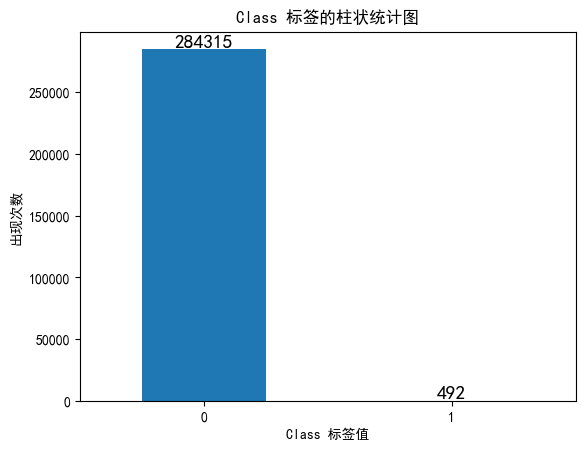

In [5]:
# 对 Class 列进行值计数, 统计不同值出现的次数。 并将这些"不同值"作为索引, "次数" 作为值, 返回成一个 Series 对象
count_classes = pd.value_counts( data['Class'], sort=True ).sort_index()

# 绘制柱形图
ax = count_classes.plot(kind = 'bar', rot=0)

# 在柱形上添加数值标签
for p in ax.containers:
    ax.bar_label(p, fontsize=14)

plt.title('Class 标签的柱状统计图')
plt.xlabel('Class 标签值')
plt.ylabel('出现次数')

print(count_classes.values)

观察发现, Class 中值为 1 的比例非常低, 现实中欺诈的信用卡比例也是很低的, 所以 1 表示应该是异常样本(欺诈), 0 表示的应该就是正常样本。

样本数量不均匀的情况下, 我们一般有两种处理方式： 过采样和下采样。

为什么样本数分布不均匀要进行处理呢? 举个例子, 假如有 10,000 人, 里面有 9,900 人是正常的, 100 人是癌症。
这种情况下, 你训练模型, 那么模型会发现, 猜每个人都是正常的, 准确率能达到了 99%。
这样一来, 当你实际应用模型时, 默认对于任何人, 都认为他是正常的。
这样的模型是没有意义的。 所以训练模型时, 需要对样本分布不均匀的数据进行处理。

## 3. 对原始数据划分训练集和测试集

这里划分出的测试集, 将用于后面三种模型(不处理, 下采样, 过采样)的测试。

后面的下采样, 过采样, 将是基于这里划分出的训练集。

In [6]:
from sklearn.model_selection import train_test_split


$\mathbf{X}$ 是特征矩阵

$\mathbf{y}$ 是标签向量

In [7]:
X_origin = data.loc[:, data.columns != 'Class']
y_origin = data.loc[:, data.columns == 'Class']

# random_state=42 是为了让每次随机划分的结果相同
X_train, X_test, y_train, y_test = train_test_split(
    X_origin, y_origin, test_size=0.3, random_state=42)
print('原始数据集划分')
print('\t训练数据集数量: ', len(X_train))
print('\t测试数据集数量: ', len(X_test))
print('\t总数据集数量: ', len(X_train) + len(X_test))

train_data = pd.concat([X_train, y_train], axis=1)
train_data.shape

原始数据集划分
	训练数据集数量:  199364
	测试数据集数量:  85443
	总数据集数量:  284807


(199364, 30)

## 4. 执行下采样生成的数据集

下采样: 
  比如 A, B 两类, A 类的样本数有 10,000; B 类样本数只有 100; 
  下采样就是从 A 类样本中随机抽取和B类样本数相同的样本, 即 100 个样本,
  然后将从 A 类中随机取出的样本和 B 类的样本组成成新的数据集。
  这样新的数据集中 A, B 两类的分布就均匀了。

In [8]:
# 欺诈样本
fraud_data = train_data[train_data.Class == 1]
# 正常样本
normal_data = train_data[train_data.Class == 0]
# 从正常样本中随机抽取盒欺诈样本数量相同的样本
random_normal_data = normal_data.sample(n=len(fraud_data), random_state=42)

# 合并欺诈样本和随机选取的正常样本
undersampled_data = pd.concat([fraud_data, random_normal_data], axis=0).sample(frac=1) # sample(frac=1) 用于打乱顺序

X_undersampled = undersampled_data.loc[:, undersampled_data.columns != 'Class']
y_undersampled = undersampled_data.loc[:, undersampled_data.columns == 'Class']

print('原始样本的分布: ', train_data.groupby('Class').size().values)
print('下采样后样本的分布: ', undersampled_data.groupby('Class').size().values)

X_undersampled.shape, y_undersampled.shape

原始样本的分布:  [199008    356]
下采样后样本的分布:  [356 356]


((712, 29), (712, 1))

## 5. 执行过采样生成的数据集

In [9]:
from imblearn.over_sampling import SMOTE # pip install imblearn


In [10]:
# 使用SMOTE进行过采样
smote = SMOTE(random_state=0)
# 有时也会命名为 X_resampled, y_resampled
X_over_sample, y_over_sample = smote.fit_resample(X_train, y_train)

X_oversampled, X_train_over_sample, y_oversampled, y_test_over_sample = train_test_split(
    X_over_sample, y_over_sample, test_size=0.3, random_state=42)


X_oversampled.shape, y_oversampled.shape

((278611, 29), (278611, 1))

## 6. 不执行过采样和下采样的数据集

In [11]:
X, y = X_train, y_train

X.shape, y.shape

((199364, 29), (199364, 1))

## 7. 训练模型, 求取最优参数 c

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, recall_score, confusion_matrix, classification_report


求取最优参数 C

K 折交叉验算

In [13]:
def printing_KFold_scores(X_train_data, y_train_data):

    # 这个是正则化惩罚项参数.
    c_param_range = [0.001, 0.01, 0.1, 1, 10]

    # K 折
    K = 5

    # 创建一个表格存储分数
    original_columns = ['C_parameter', 'Mean recall scores']
    new_columns = [f'score-{i}' for i in range(1, K+1)]
    result_columns = original_columns[:1] + new_columns + original_columns[1:]
    results_table = pd.DataFrame(columns=result_columns)
    j = 0

    # 这个循环用来查看哪个 c 参数效果好
    for c_param in c_param_range:

        # 创建逻辑回归分类器
        logreg = LogisticRegression(C=c_param, penalty='l2')

        # 创建KFold对象
        kfold = KFold(n_splits=K, shuffle=False)

        # 创建recall_score评分器
        scorer = make_scorer(recall_score, average='macro')

        # 使用交叉验证计算模型的精度
        scores = cross_val_score(
            logreg, X_train_data.values, y_train_data.values.flatten(), cv=kfold, scoring=scorer)

        row = pd.Series(
            {'score-' + str(i+1): f'{scores[i]:.3f}' for i in range(len(scores))})
        results_table = pd.concat(
            [results_table, row.to_frame().T], ignore_index=True)
        results_table.loc[j, 'C_parameter'] = c_param
        results_table.loc[j, 'Mean recall scores'] = float(scores.mean())
        j += 1

    i_max = results_table['Mean recall scores'].astype(float).idxmax()
    best_score = results_table.loc[i_max, 'Mean recall scores']
    best_c_parameter = results_table.loc[i_max, 'C_parameter']
    
    return best_c_parameter, best_score, results_table


原始数据作为训练集训练模型

In [14]:
best_c, best_scores, scores_table = printing_KFold_scores(X, y)
print(f'best_c: {best_c};')
print(f'best_scores: {best_scores};')
scores_table

best_c: 1;
best_scores: 0.8073968271739753;


,C_parameter,score-1,score-2,score-3,score-4,score-5,Mean recall scores
0,0.001,0.753,0.724,0.750,0.747,0.785,0.75167
1,0.01,0.785,0.759,0.819,0.760,0.826,0.78979
2,0.1,0.785,0.776,0.826,0.767,0.854,0.801509
3,1,0.785,0.784,0.833,0.767,0.868,0.807397
4,10,0.785,0.784,0.833,0.767,0.868,0.807394


下采样数据集作为训练集训练模型

In [15]:
best_c_us, best_scores_us, scores_table_us = printing_KFold_scores(X_undersampled, y_undersampled)
print(f'best_c_us: {best_c_us};')
print(f'best_scores_us: {best_scores_us};')
scores_table_us

best_c_us: 1;
best_scores_us: 0.9372533157678837;


c:\Users\Linhieng\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,C_parameter,score-1,score-2,score-3,score-4,score-5,Mean recall scores
0,0.001,0.943,0.907,0.902,0.901,0.878,0.906242
1,0.01,0.957,0.922,0.924,0.926,0.905,0.92677
2,0.1,0.951,0.936,0.920,0.917,0.911,0.926916
3,1,0.951,0.937,0.936,0.939,0.924,0.937253
4,10,0.951,0.937,0.936,0.930,0.924,0.93542


过采样数据集作为训练集训练模型

In [16]:
best_c_os, best_scores_os, scores_table_os = printing_KFold_scores(X_oversampled, y_oversampled)
print(f'best_c_os: {best_c_os};')
print(f'best_scores_os: {best_scores_os};')
scores_table_os

c:\Users\Linhieng\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


best_c_os: 10;
best_scores_os: 0.9454796729774951;


,C_parameter,score-1,score-2,score-3,score-4,score-5,Mean recall scores
0,0.001,0.942,0.943,0.944,0.943,0.941,0.942622
1,0.01,0.945,0.944,0.946,0.945,0.943,0.94455
2,0.1,0.946,0.945,0.947,0.946,0.943,0.945372
3,1,0.946,0.945,0.947,0.946,0.944,0.945476
4,10,0.946,0.945,0.947,0.946,0.944,0.94548


## 8. 应用到测试集查看效果

In [17]:
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns


默认数据集训练出来的模型

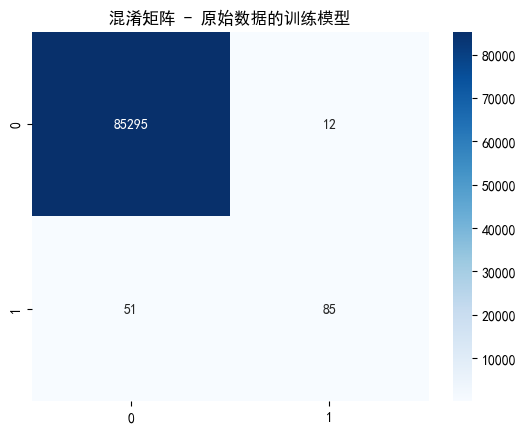

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.88      0.62      0.73       136

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [18]:
# 使用前面求出的最优参数 c 训练模型
lr = LogisticRegression(C=best_c, penalty='l2')
lr.fit(X.values, y.values.flatten())

# 测试模型
y_pred = lr.predict(X_test.values)

# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 可视化混淆矩阵
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('混淆矩阵 - 原始数据的训练模型')
plt.show()

# 生成分类指标报告
report = classification_report(y_test, y_pred)

# 打印报告
print(report)


下采样数据集训练出来的模型

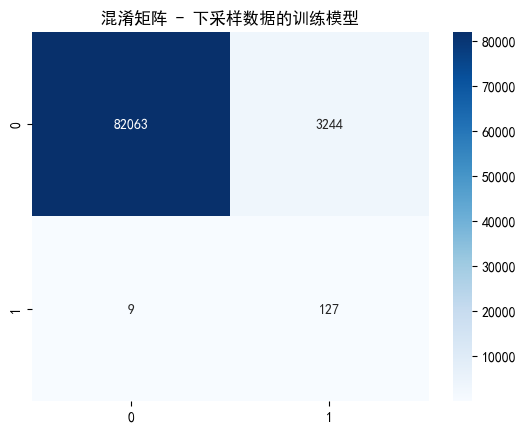

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85307
           1       0.04      0.93      0.07       136

    accuracy                           0.96     85443
   macro avg       0.52      0.95      0.53     85443
weighted avg       1.00      0.96      0.98     85443



In [19]:
# 使用下采样数据集和下采样数据集的最优参数 c 训练模型
lr_us = LogisticRegression(C=best_c_us, penalty='l2')
lr_us.fit(X_undersampled.values, y_undersampled.values.flatten())

# 测试模型使用的应该是同一套测试集
y_pred_us = lr_us.predict(X_test.values)

# 计算混淆矩阵
cm_us = confusion_matrix(y_test, y_pred_us)

# 可视化混淆矩阵
sns.heatmap(cm_us, annot=True, fmt='d', cmap='Blues')
plt.title('混淆矩阵 - 下采样数据的训练模型')
plt.show()

# 生成分类指标报告
report_os = classification_report(y_test, y_pred_us)

# 打印报告
print(report_os)

过采样数据集训练出来的模型

c:\Users\Linhieng\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


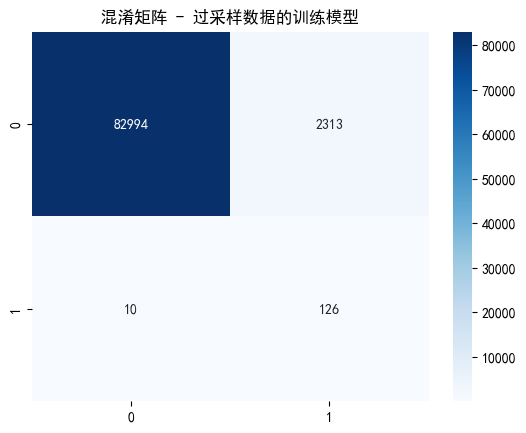

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85307
           1       0.04      0.93      0.07       136

    accuracy                           0.96     85443
   macro avg       0.52      0.95      0.53     85443
weighted avg       1.00      0.96      0.98     85443



In [20]:
# 使用下采样数据集和下采样数据集的最优参数 c 训练模型
lr_os = LogisticRegression(C=best_c_os, penalty='l2')
lr_os.fit(X_oversampled.values, y_oversampled.values.flatten())

# 测试模型使用的应该是同一套测试集
y_pred_os = lr_os.predict(X_test.values)

# 计算混淆矩阵
cm_os = confusion_matrix(y_test, y_pred_os)

# 可视化混淆矩阵
sns.heatmap(cm_os, annot=True, fmt='d', cmap='Blues')
plt.title('混淆矩阵 - 过采样数据的训练模型')
plt.show()

# 生成分类指标报告
report_os = classification_report(y_test, y_pred_us)

# 打印报告
print(report_os)

## 9. 查看逻辑回归的阈值对结果的影响

In [21]:
thresholds = np.arange(0.1, 1.0, 0.1)

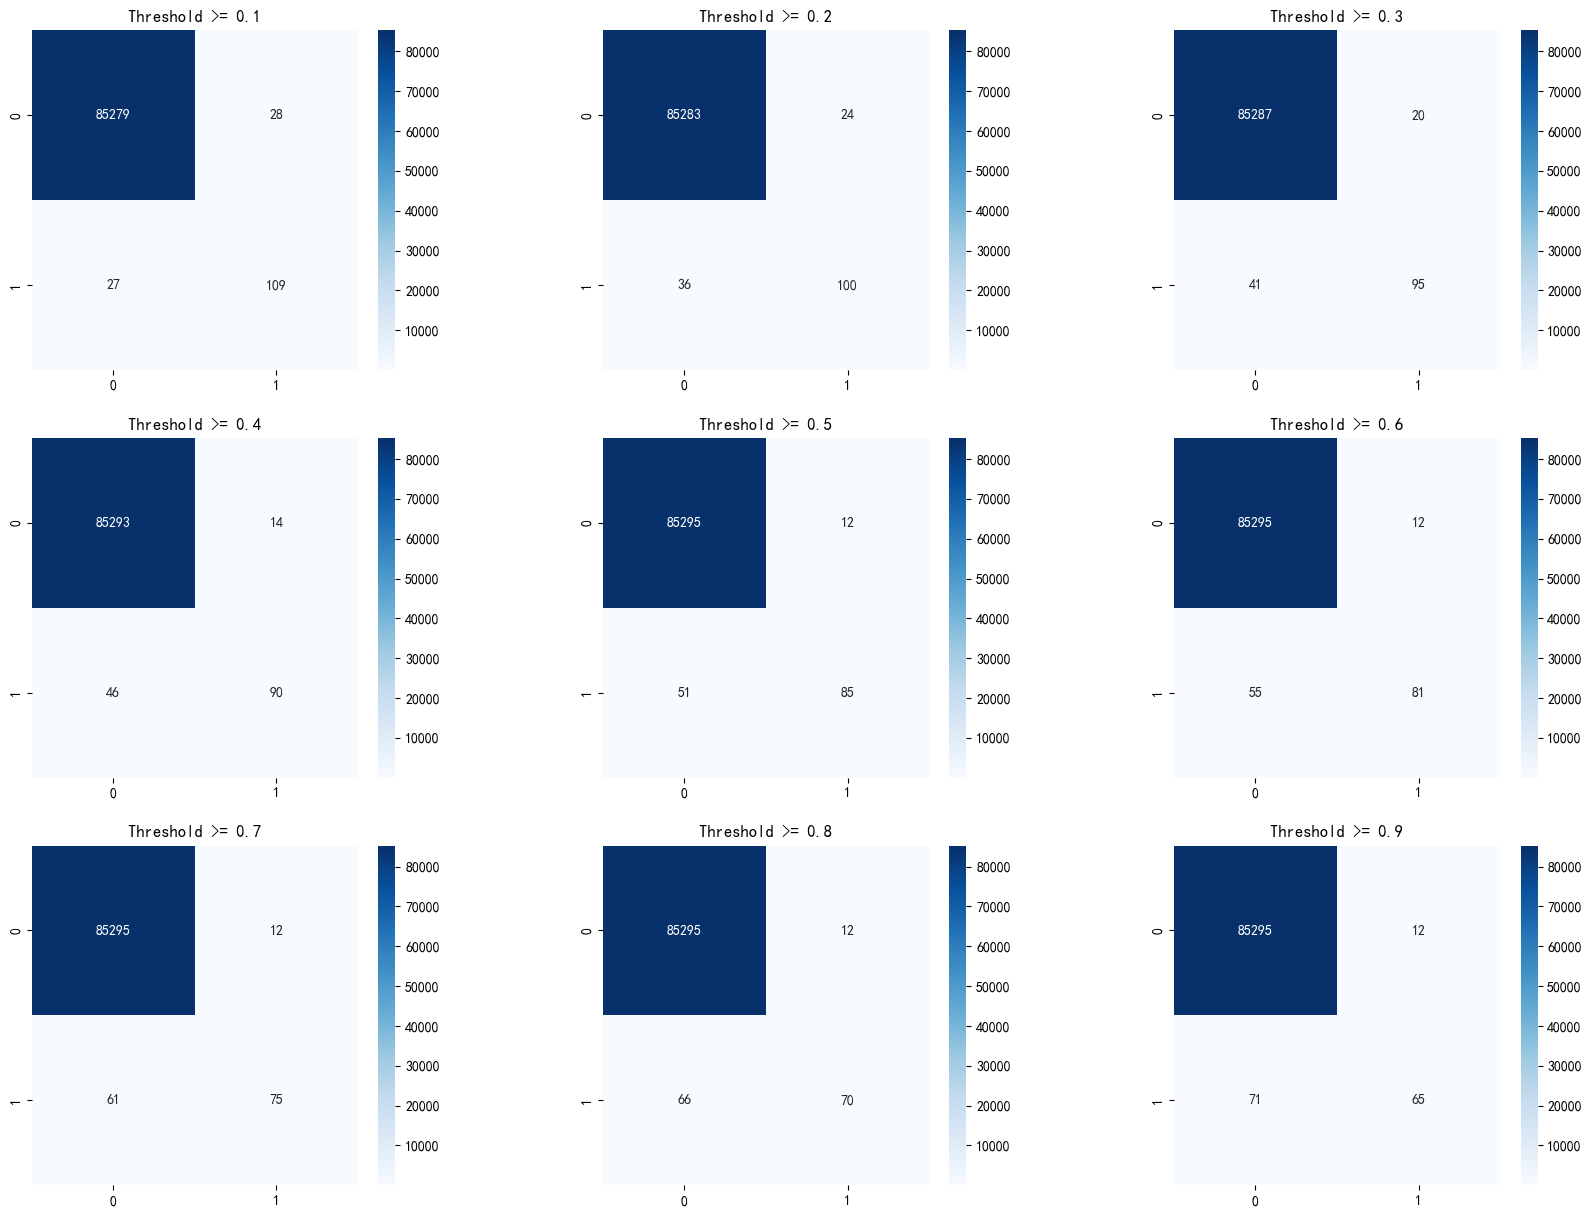

In [22]:
y_pred_proba = lr.predict_proba(X_test.values)

j = 1
fig = plt.figure(figsize=(20, 15))

for i in thresholds:
    y_test_predictions_high_recall = y_pred_proba[:, 1] > i

    plt.subplot(3, 3, j)
    j += 1

    cm = confusion_matrix(
        y_test, y_test_predictions_high_recall)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Threshold >= {i:.1f}')

# 调整子图之间的间距
fig.subplots_adjust(hspace=0.2, wspace=0.4)
plt.show()


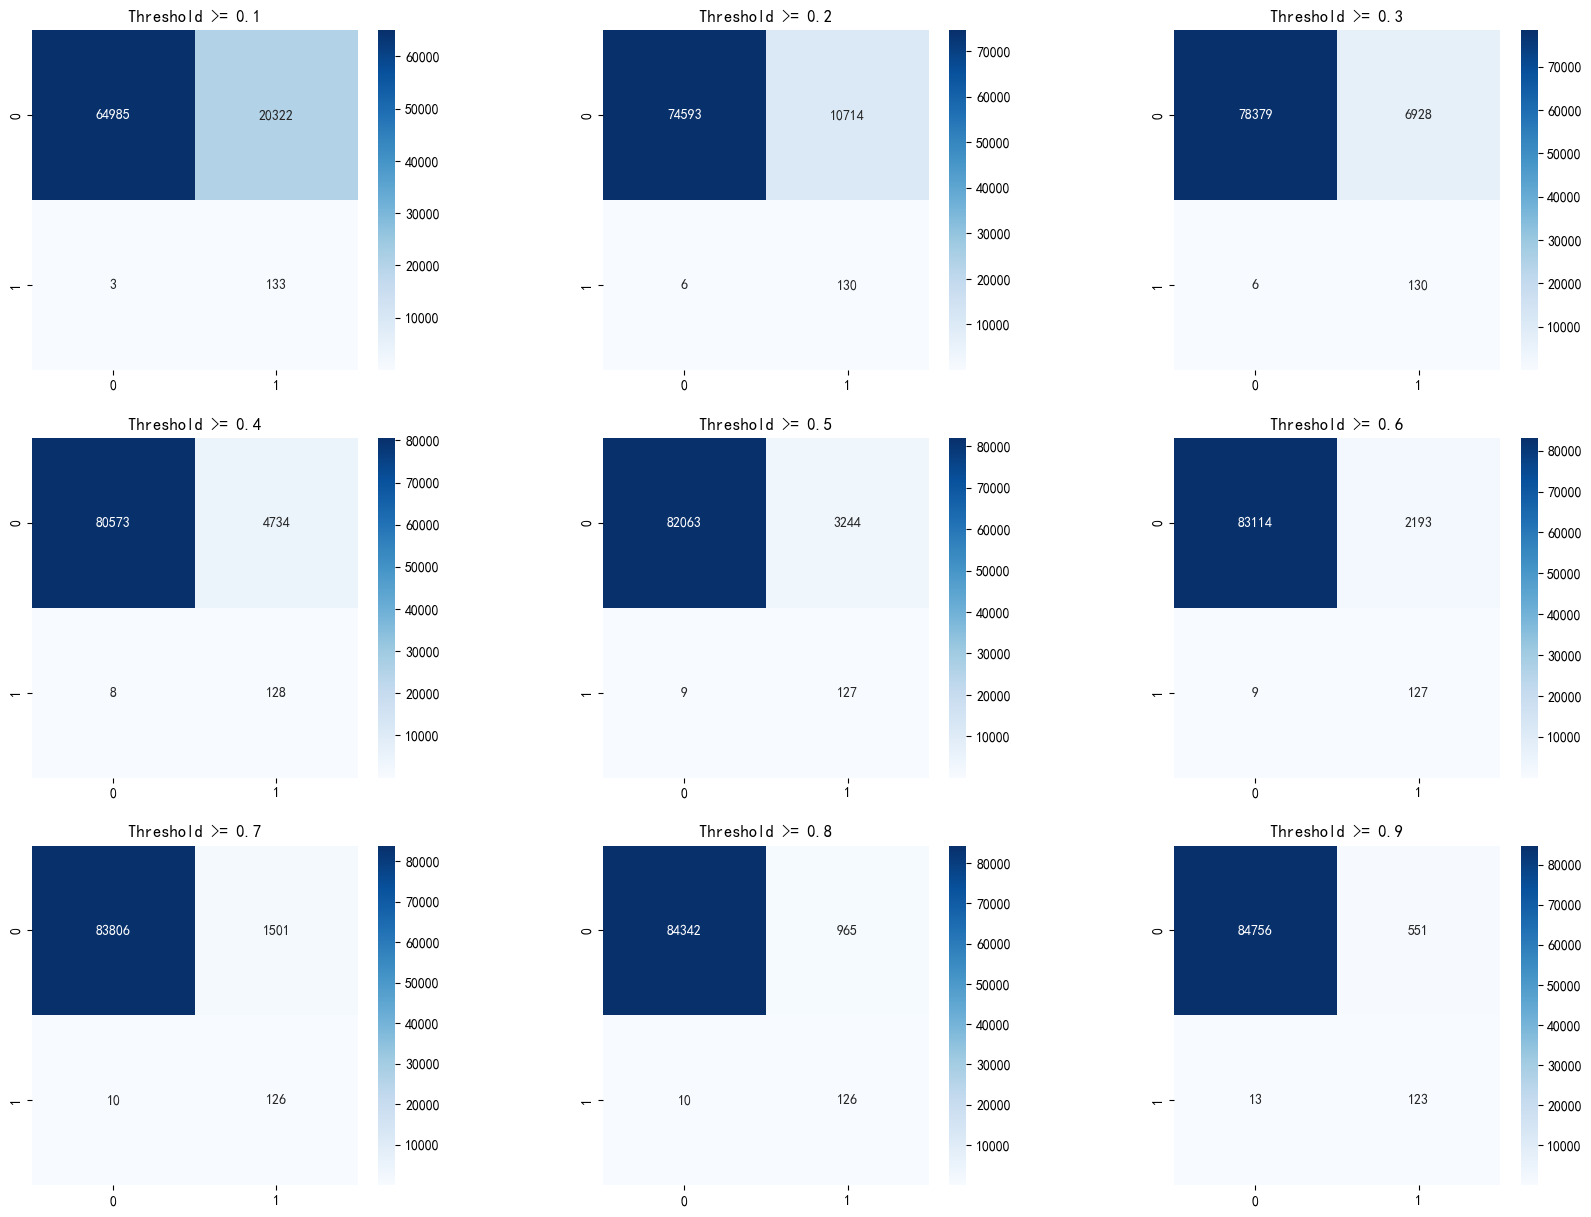

In [23]:
y_pred_proba_us = lr_us.predict_proba(X_test.values)

j = 1
fig = plt.figure(figsize=(20, 15))

for i in thresholds:
    y_test_predictions_high_recall_us = y_pred_proba_us[:, 1] > i

    plt.subplot(3, 3, j)
    j += 1

    cm = confusion_matrix(
        y_test, y_test_predictions_high_recall_us)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Threshold >= {i:.1f}')

# 调整子图之间的间距
fig.subplots_adjust(hspace=0.2, wspace=0.4)
plt.show()


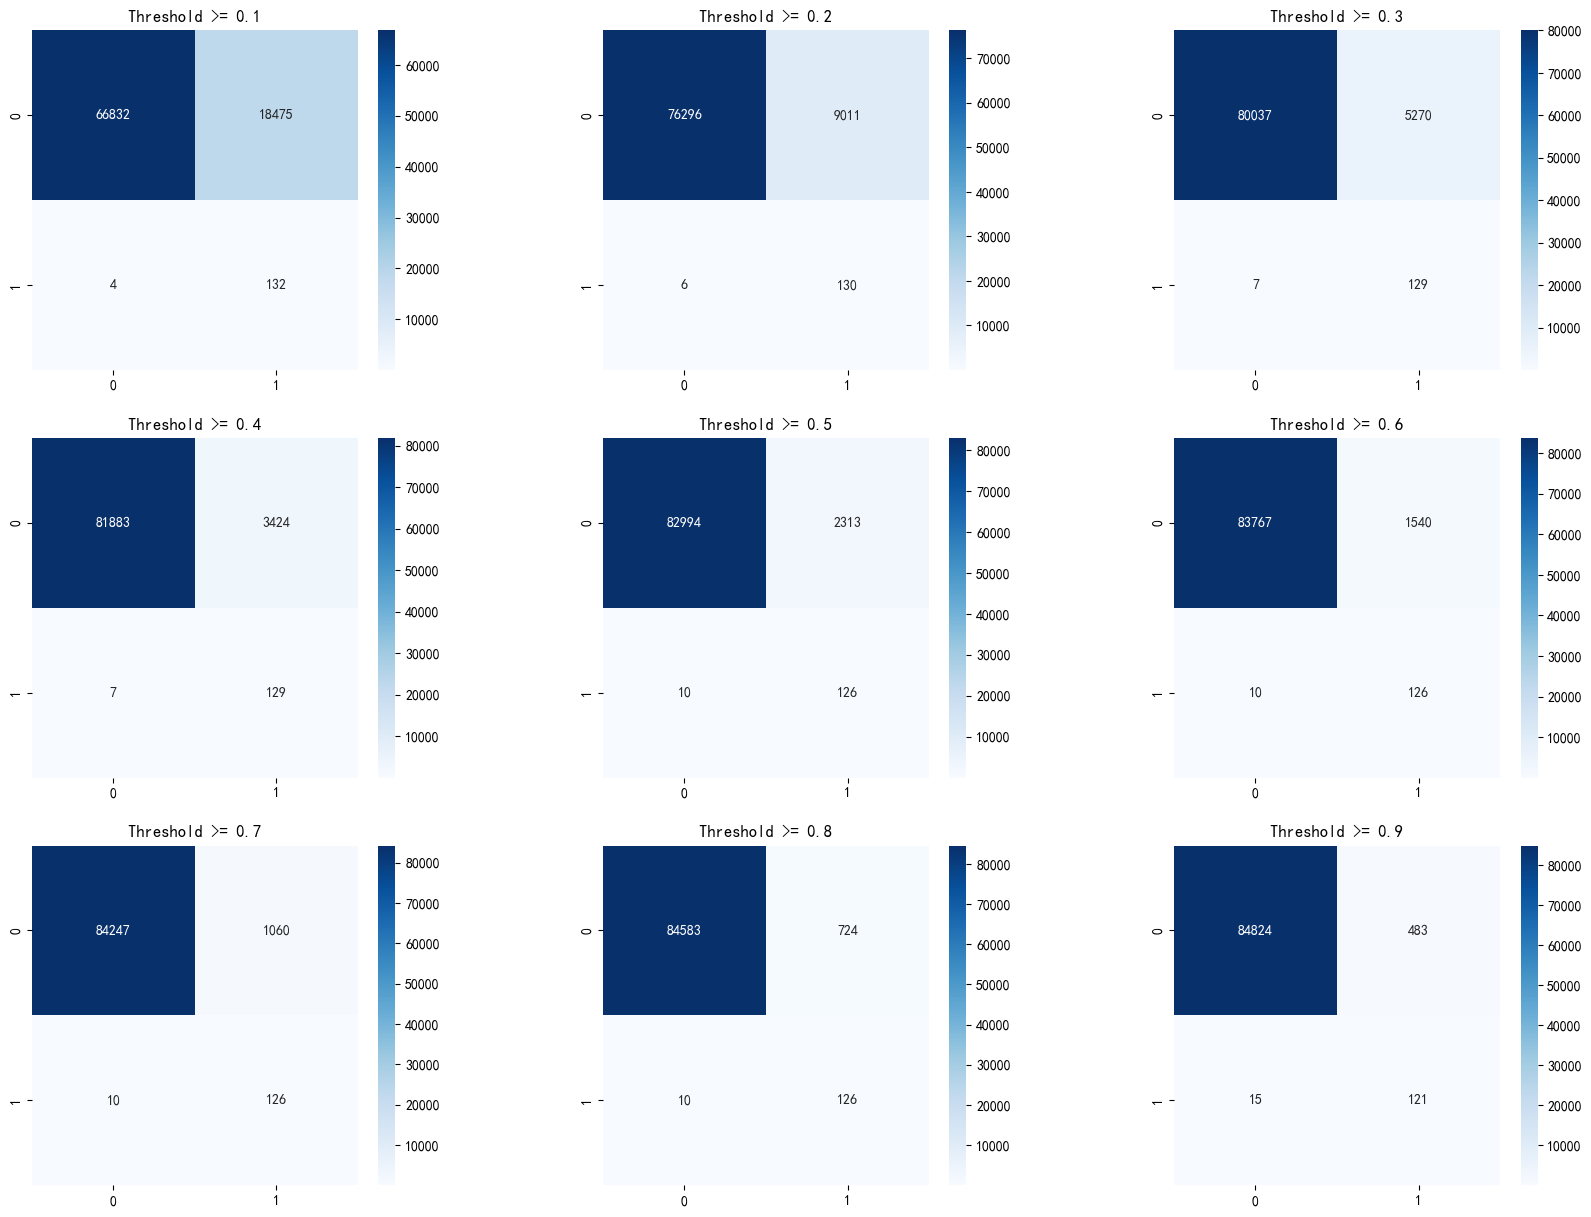

In [24]:
y_pred_proba_os = lr_os.predict_proba(X_test.values)

j = 1
fig = plt.figure(figsize=(20, 15))

for i in thresholds:
    y_test_predictions_high_recall_os = y_pred_proba_os[:, 1] > i

    plt.subplot(3, 3, j)
    j += 1

    cm = confusion_matrix(
        y_test, y_test_predictions_high_recall_os)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Threshold >= {i:.1f}')

# 调整子图之间的间距
fig.subplots_adjust(hspace=0.2, wspace=0.4)
plt.show()
